In [16]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

In [22]:
df = pd.read_csv('data.csv')
df

,accx,accy,accz,subject,activity
0,0.188108,0.786717,0.571904,1,6
1,0.190062,0.786224,0.573073,1,6
2,0.190812,0.786990,0.573594,1,6
3,0.189444,0.789792,0.575632,1,6
4,0.187818,0.791043,0.575268,1,6
...,...,...,...,...,...
89995,0.893984,0.106965,-0.047759,9,2
89996,0.937161,0.118597,-0.002402,9,2
89997,1.036865,0.119752,0.024042,9,2
89998,1.114417,0.129106,-0.009902,9,2


In [23]:
personal_dir = os.path.join("personal_data")


activity_code = {"Walking": 1, "Upstairs": 2, "Downstairs": 3,
           "Sitting": 4, "Standing": 5, "Laying": 6}

recorded_df = pd.DataFrame()

recorded_activities = []

for filename in ["aditya_downstairs.csv", "aditya_laying.csv", "aditya_sitting.csv", "aditya_standing.csv", "aditya_upstairs.csv", "aditya_walking.csv", "ankit_downstairs.csv", "ankit_laying.csv", "ankit_sitting.csv", "ankit_standing.csv", "ankit_upstairs.csv", "ankit_walking.csv", "kaushik_downstairs.csv", "kaushik_laying.csv", "kaushik_sitting.csv", "kaushik_standing.csv", "kaushik_upstairs.csv", "kaushik_walking.csv", "keshav_downstairs.csv", "keshav_laying.csv", "keshav_sitting.csv", "keshav_standing.csv", "keshav_upstairs.csv", "keshav_walking.csv"]:

    df = pd.read_csv(os.path.join(personal_dir, filename))

    df = df[["ax (m/s^2)", "ay (m/s^2)", "az (m/s^2)"]].iloc[250:250+500]

    df.columns = ["accx", "accy", "accz"]

    df = df / 9.80665
    
    activity = filename.split("_")[1].split(".")[0].title()
    activity_label = activity_code[activity]

    df["Activities"] = activity_label
    
    recorded_df = pd.concat([recorded_df, df], ignore_index=True)
    recorded_activities.append(activity_label)
    
print(recorded_df)
print(recorded_activities)

           accx      accy      accz  Activities
0     -0.109864  0.340493  0.173199           3
1     -0.109864  0.340493  0.173199           3
2     -0.163450  0.497632  0.003630           3
3     -0.163450  0.497632  0.003630           3
4     -0.137417  0.724590 -0.137417           3
...         ...       ...       ...         ...
11995 -0.176044  0.223175  0.023453           1
11996 -0.176044  0.223175  0.023453           1
11997  0.116003  0.303549 -0.030490           1
11998  0.116003  0.303549 -0.030490           1
11999  0.277913  0.326248  0.175136           1

[12000 rows x 4 columns]
[3, 6, 4, 5, 2, 1, 3, 6, 4, 5, 2, 1, 3, 6, 4, 5, 2, 1, 3, 6, 4, 5, 2, 1]


C:\Users\HP\AppData\Local\Temp\ipykernel_23036\1833900991.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = mode(y_pred_full.reshape(-1, 500), axis=1).mode.flatten()
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on recorded data without featuring: 12.50%
Precision on recorded data: 0.02
Recall on recorded data: 0.12


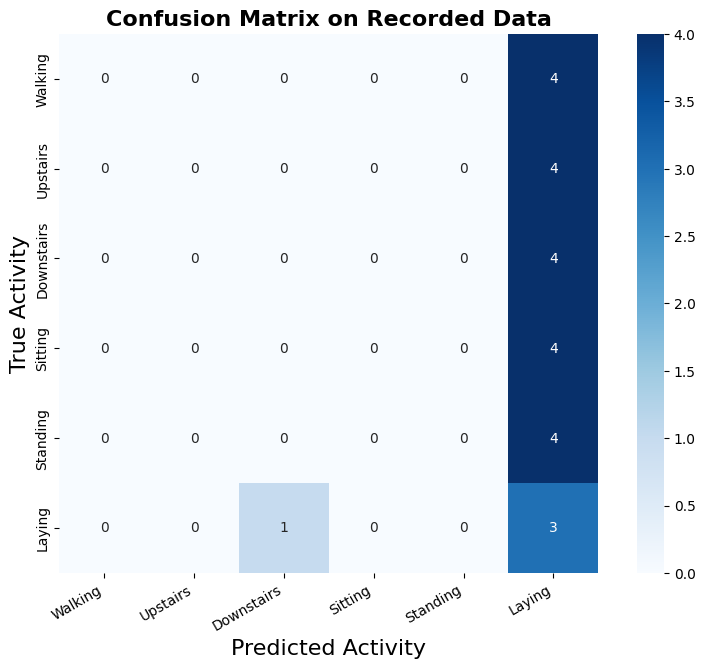

In [24]:
train_data_path = 'data.csv'  # Replace with the path to your data.csv
train_df = pd.read_csv(train_data_path)


X_train = train_df[['accx', 'accy', 'accz']].values  # Features from training data
y_train = train_df['activity'].values  

# Step 3: Train the Decision Tree Model
model = DecisionTreeClassifier(random_state=360)
model.fit(X_train, y_train)

X_test = recorded_df[['accx', 'accy', 'accz']].values

# Step 5: Predict on Recorded Data
y_pred_full = model.predict(X_test)

y_pred = mode(y_pred_full.reshape(-1, 500), axis=1).mode.flatten()

y_test = np.array(recorded_activities)

# Calculate Accuracy, Precision, Recall, Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the Results
print(f"Accuracy on recorded data without featuring: {accuracy * 100:.2f}%")
print(f"Precision on recorded data: {precision:.2f}")
print(f"Recall on recorded data: {recall:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, square=True, cmap="Blues", fmt="d",
            xticklabels=list(activity_code.keys()), 
            yticklabels=list(activity_code.keys()))
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on Recorded Data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(rotation=30, ha="right")
plt.show()

In [25]:
import tsfel

cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
tsfel_recorded_df = tsfel.time_series_features_extractor(cfg_file, recorded_df[['accx', 'accy', 'accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
tsfel_recorded_df

*** Feature extraction started ***



*** Feature extraction finished ***


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_0,accz_Wavelet variance_1,accz_Wavelet variance_2,accz_Wavelet variance_3,accz_Wavelet variance_4,accz_Wavelet variance_5,accz_Wavelet variance_6,accz_Wavelet variance_7,accz_Wavelet variance_8,accz_Zero crossing rate
0,31.450014,1.805854,5.0,3.151304,5.517305,100.0,400.0,-0.162828,0.183753,0.002,...,0.004491,0.027650,0.051558,0.064881,0.077385,0.092829,0.108338,0.119929,0.125354,51.0
1,0.708251,0.372273,3.0,0.070967,5.013593,100.0,400.0,0.034609,0.039830,0.002,...,0.000011,0.000039,0.000064,0.000075,0.000078,0.000088,0.000106,0.000128,0.000147,0.0
2,0.007690,0.027068,3.0,0.000771,5.655766,100.0,400.0,-0.001550,0.003956,0.002,...,0.000010,0.000078,0.000162,0.000169,0.000140,0.000127,0.000137,0.000160,0.000190,61.0
3,0.011258,0.033892,4.0,0.001128,3.384374,100.0,400.0,-0.000337,0.004935,0.002,...,0.000009,0.000032,0.000053,0.000063,0.000072,0.000081,0.000091,0.000102,0.000116,73.0
4,16.719418,1.343362,5.0,1.675292,4.893641,100.0,400.0,-0.120072,0.119704,0.002,...,0.001127,0.009294,0.027323,0.053883,0.086130,0.118106,0.143596,0.160742,0.171386,29.0
5,26.795398,1.722547,4.0,2.684910,5.059997,100.0,400.0,-0.169762,0.169905,0.002,...,0.006012,0.018134,0.043689,0.067486,0.080250,0.088588,0.099337,0.114502,0.133734,42.0
6,51.972026,2.369422,4.0,5.207618,4.432266,100.0,400.0,-0.236737,0.255612,0.002,...,0.012156,0.088340,0.240487,0.398194,0.490220,0.506630,0.482401,0.459554,0.457255,64.0
7,0.011289,0.037625,2.0,0.001131,5.084572,100.0,400.0,-0.006108,-0.000092,0.002,...,0.000006,0.000017,0.000020,0.000028,0.000035,0.000039,0.000041,0.000041,0.000039,84.0
8,0.035466,0.080033,4.0,0.003554,5.006878,100.0,400.0,0.005904,0.009993,0.002,...,0.000009,0.000038,0.000068,0.000085,0.000091,0.000091,0.000091,0.000094,0.000100,0.0
9,0.069156,0.082833,6.0,0.006930,7.274983,100.0,400.0,-0.009167,0.006924,0.002,...,0.000008,0.000046,0.000099,0.000143,0.000169,0.000183,0.000194,0.000201,0.000201,57.0


In [28]:
import tsfel

cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
tsfel_df = tsfel.time_series_features_extractor(cfg_file, train_df[['accx', 'accy', 'accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
tsfel_df

*** Feature extraction started ***



*** Feature extraction finished ***


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_0,accz_Wavelet variance_1,accz_Wavelet variance_2,accz_Wavelet variance_3,accz_Wavelet variance_4,accz_Wavelet variance_5,accz_Wavelet variance_6,accz_Wavelet variance_7,accz_Wavelet variance_8,accz_Zero crossing rate
0,17.785698,1.882075,2.0,1.782134,5.010007,100.0,400.0,0.186568,0.190577,0.002,...,0.000509,0.001804,0.003904,0.006817,0.010578,0.015206,0.020605,0.026678,0.033373,0.0
1,29.374624,2.418645,4.0,2.943349,4.951584,100.0,400.0,0.239691,0.245431,0.002,...,0.000062,0.000223,0.000460,0.000755,0.001112,0.001549,0.002065,0.002647,0.003289,0.0
2,14.915826,1.722628,5.0,1.494572,4.891174,100.0,400.0,0.167716,0.178158,0.002,...,0.000996,0.003563,0.007685,0.013556,0.021030,0.030006,0.040506,0.052448,0.065698,0.0
3,10.803063,1.466016,4.0,1.082471,4.866101,100.0,400.0,0.141393,0.150828,0.002,...,0.000255,0.000941,0.001950,0.003375,0.005150,0.007244,0.009687,0.012507,0.015707,0.0
4,39.642438,2.809980,3.0,3.972188,4.983422,100.0,400.0,0.278751,0.284346,0.002,...,0.001103,0.003941,0.008476,0.014722,0.022834,0.032812,0.044494,0.057715,0.072379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,430.187347,9.028684,5.0,43.104945,4.914747,100.0,400.0,0.732451,1.062091,0.002,...,0.004605,0.020702,0.042012,0.073398,0.119603,0.177105,0.233516,0.276743,0.303233,8.0
176,422.753737,8.726592,4.0,42.360094,4.876947,100.0,400.0,0.647065,1.148603,0.002,...,0.005568,0.035226,0.058800,0.072518,0.094563,0.125884,0.154179,0.169034,0.169699,6.0
177,503.070800,9.779029,5.0,50.407896,5.023109,100.0,400.0,0.804965,1.148863,0.002,...,0.005645,0.024874,0.035487,0.041956,0.054222,0.074900,0.100605,0.125199,0.144344,6.0
178,527.866197,10.005012,6.0,52.892405,5.041725,100.0,400.0,0.826546,1.130707,0.002,...,0.001330,0.004920,0.008734,0.013286,0.019779,0.029384,0.042897,0.059884,0.079087,63.0


Accuracy on recorded data (using TSFEL): 37.50%


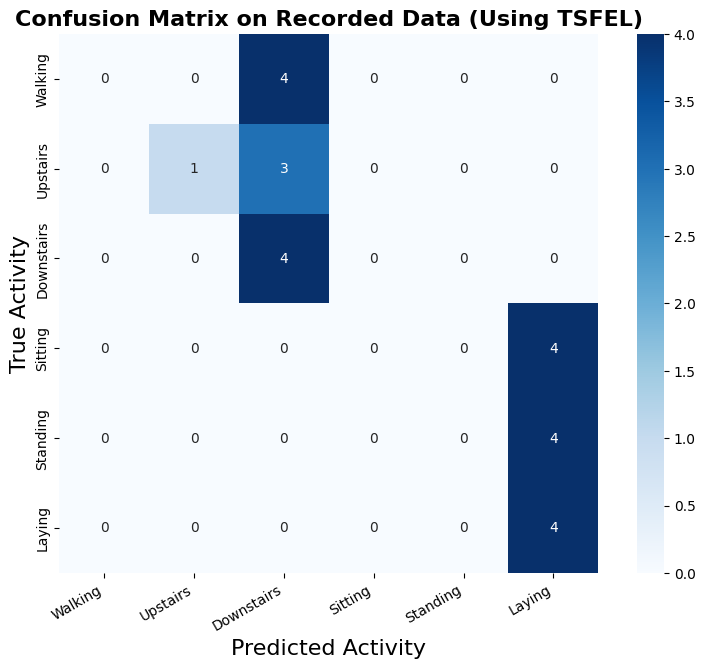

In [32]:
classes = {value: key for key, value in activity_code.items()}

segment_size = 500
num_segments = len(train_df) // segment_size

y_train = []
for i in range(num_segments):
    segment_labels = train_df['activity'].iloc[i * segment_size: (i + 1) * segment_size]
    y_train.append(segment_labels.mode()[0])  # Using mode to determine the label for each segment

y_train = np.array(y_train)

# Train your model
model = DecisionTreeClassifier(random_state=360)
model.fit(tsfel_df.values, y_train)

# Predict on the recorded data
y_pred = model.predict(tsfel_recorded_df.values)

# Evaluate the model
accuracy = accuracy_score(recorded_activities, y_pred)
conf_matrix = confusion_matrix(recorded_activities, y_pred)

print(f"Accuracy on recorded data (using TSFEL): {accuracy * 100:.2f}%")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.values(), 
            yticklabels=classes.values())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on Recorded Data (Using TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(rotation=30, ha="right")
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
data_path = 'data.csv'  # Replace with your actual path to data.csv
df = pd.read_csv(data_path)

# Display a few rows of the dataframe
print(df.head())

# Preprocessing: Normalize the accelerometer data using StandardScaler
scaler = StandardScaler()
df[['accx', 'accy', 'accz']] = scaler.fit_transform(df[['accx', 'accy', 'accz']])

# Check for missing data in 'activity' column
if df['activity'].isnull().any():
    print("Warning: Missing values found in the 'activity' column. Filling or removing.")
    df = df.dropna(subset=['activity'])

# Define the number of few-shot examples you want to use
num_few_shot_examples = 5

# Randomly sample few-shot examples from the dataset
few_shot_df = df.sample(n=num_few_shot_examples, random_state=42)

# Print few-shot examples
print("Few-Shot Examples:")
for index, row in few_shot_df.iterrows():
    print(f"accx: {row['accx']:.3f}, accy: {row['accy']:.3f}, accz: {row['accz']:.3f} -> activity: {int(row['activity'])}")


       accx      accy      accz  subject  activity
0  0.188108  0.786717  0.571904        1         6
1  0.190062  0.786224  0.573073        1         6
2  0.190812  0.786990  0.573594        1         6
3  0.189444  0.789792  0.575632        1         6
4  0.187818  0.791043  0.575268        1         6
Few-Shot Examples:
accx: 0.341, accy: -0.770, accz: -0.379 -> activity: 2
accx: 0.129, accy: 1.096, accz: 0.295 -> activity: 4
accx: 0.549, accy: -0.828, accz: 1.384 -> activity: 2
accx: 0.592, accy: -1.694, accz: -0.634 -> activity: 2
accx: -1.862, accy: 1.873, accz: 1.651 -> activity: 6


In [39]:
few_shot_examples = []
for index, row in few_shot_df.iterrows():
    example = f"accx: {row['accx']:.3f}, accy: {row['accy']:.3f}, accz: {row['accz']:.3f} -> activity: {row['activity']}"
    few_shot_examples.append(example)

# Print few-shot examples
print("Few-Shot Examples:")
for example in few_shot_examples:
    print(example)

Few-Shot Examples:
accx: 0.341, accy: -0.770, accz: -0.379 -> activity: 2.0
accx: 0.129, accy: 1.096, accz: 0.295 -> activity: 4.0
accx: 0.549, accy: -0.828, accz: 1.384 -> activity: 2.0
accx: 0.592, accy: -1.694, accz: -0.634 -> activity: 2.0
accx: -1.862, accy: 1.873, accz: 1.651 -> activity: 6.0


In [40]:
test_df = df.drop(few_shot_df.index)

# Format the test data similar to examples
test_data = []
for index, row in test_df.iterrows():
    query = f"accx: {row['accx']:.3f}, accy: {row['accy']:.3f}, accz: {row['accz']:.3f}"
    test_data.append((query, row['activity']))

# Display sample test query
print("\nTest Data Sample:")
print(test_data[0])


Test Data Sample:
('accx: -1.567, accy: 1.973, accz: 1.370', 6.0)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 32.73%
Precision: 0.23
Recall: 0.33


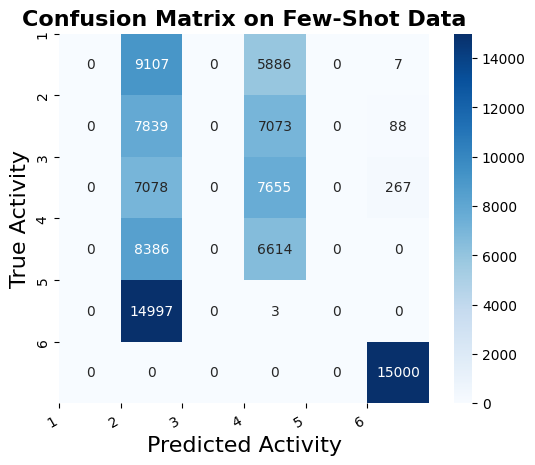

In [42]:
# Prepare data for training
X_train = few_shot_df[['accx', 'accy', 'accz']].values
y_train = few_shot_df['activity'].values

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=360)

# Train the model with few-shot examples
model.fit(X_train, y_train)

# Predict activities on the entire dataset to evaluate performance
X_test = df[['accx', 'accy', 'accz']].values
y_test = df['activity'].values

# Predict the activities
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, square=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on Few-Shot Data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(ticks=np.arange(len(conf_matrix)), labels=np.unique(y_test), rotation=30, ha="right")
plt.yticks(ticks=np.arange(len(conf_matrix)), labels=np.unique(y_test))
plt.show()
